<a href="https://colab.research.google.com/github/abhiiyer/ERA1/blob/main/Session-9_Revised/ERA1_S9_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Future print function
from __future__ import print_function

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

  Preparing metadata (setup.py) ... done


100%|██████████| 170498071/170498071 [00:03<00:00, 49019957.71it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           2,048
           Conv2d-10           [-1, 32, 30, 30]             288
           Conv2d-11           [-1, 32, 30, 30]           1,024
             ReLU-12           [-1, 32, 30, 30]               0
      BatchNor

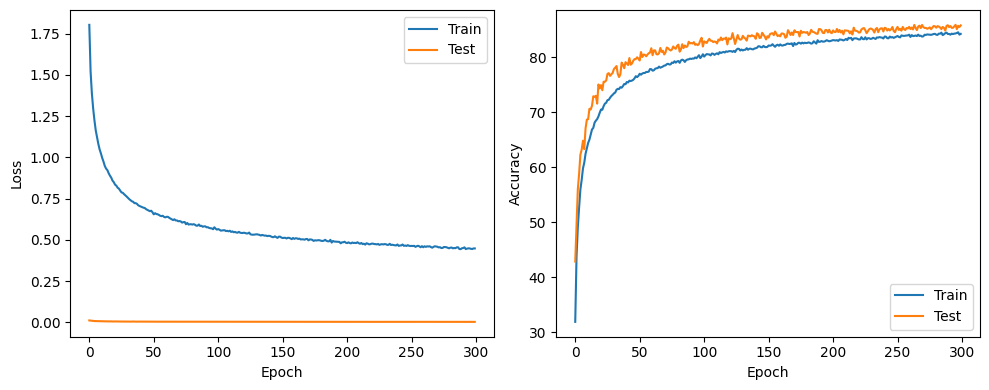

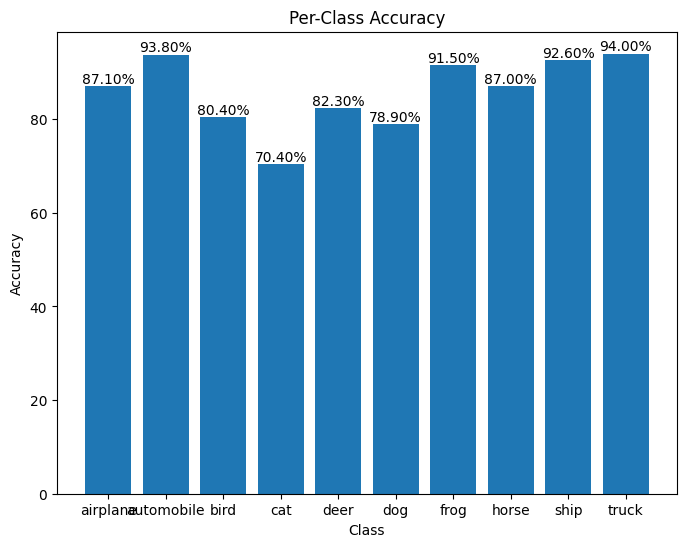

In [3]:
import torch
from torchsummary import summary
from model import Net
from data_loader import create_data_loaders
from utils import train, test, plot_learning_curve


# Check for CUDA availability
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# Set random seed for reproducibility
torch.manual_seed(42)
if use_cuda:
    torch.cuda.manual_seed(42)

# Define hyperparameters
dropout = 0.01
epochs = 300
lr = 0.015
momentum = 0.7

# Define batch size and other parameters
batch_size = 128
num_workers = 2
dataset_mean = (0.4914, 0.4822, 0.4471)  # Modify with the mean value of your dataset

# Create train and test data loaders
train_loader, test_loader = create_data_loaders(batch_size, num_workers, dataset_mean)

# Create model
model = Net(dropout).to(device)

# Model Summary
summary(model, input_size=(3, 32, 32))

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

# Train the model and obtain train losses and accuracies
train_losses, test_losses, train_accuracies, test_accuracies = train(model, device, train_loader, optimizer, criterion, epochs, test_loader)

# Test the model and obtain test loss, test accuracy, and class accuracy
test_loss, test_accuracy, class_accuracy = test(model, device, test_loader, criterion)

# Print test loss and accuracy
print("------------------------------------------------------------")
print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

# # Find max test accuracy and corresponding epoch
max_test_accuracy = max(test_accuracies)
max_test_epoch = test_accuracies.index(max_test_accuracy) + 1  # Add 1 to convert index to epoch number
print("------------------------------------------------------------")
print(f"Max Test Accuracy: {max_test_accuracy:.2f}% at Epoch {max_test_epoch}")

# Print per-class accuracy
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("------------------------------------------------------------")
print("Per-Class Accuracy:")
for i in range(10):
    print(f"Class {class_names[i]}: {class_accuracy[i]:.2f}%")

# Plot learning curves
plot_learning_curve(train_losses, test_losses, train_accuracies, test_accuracies, class_accuracy, class_names)


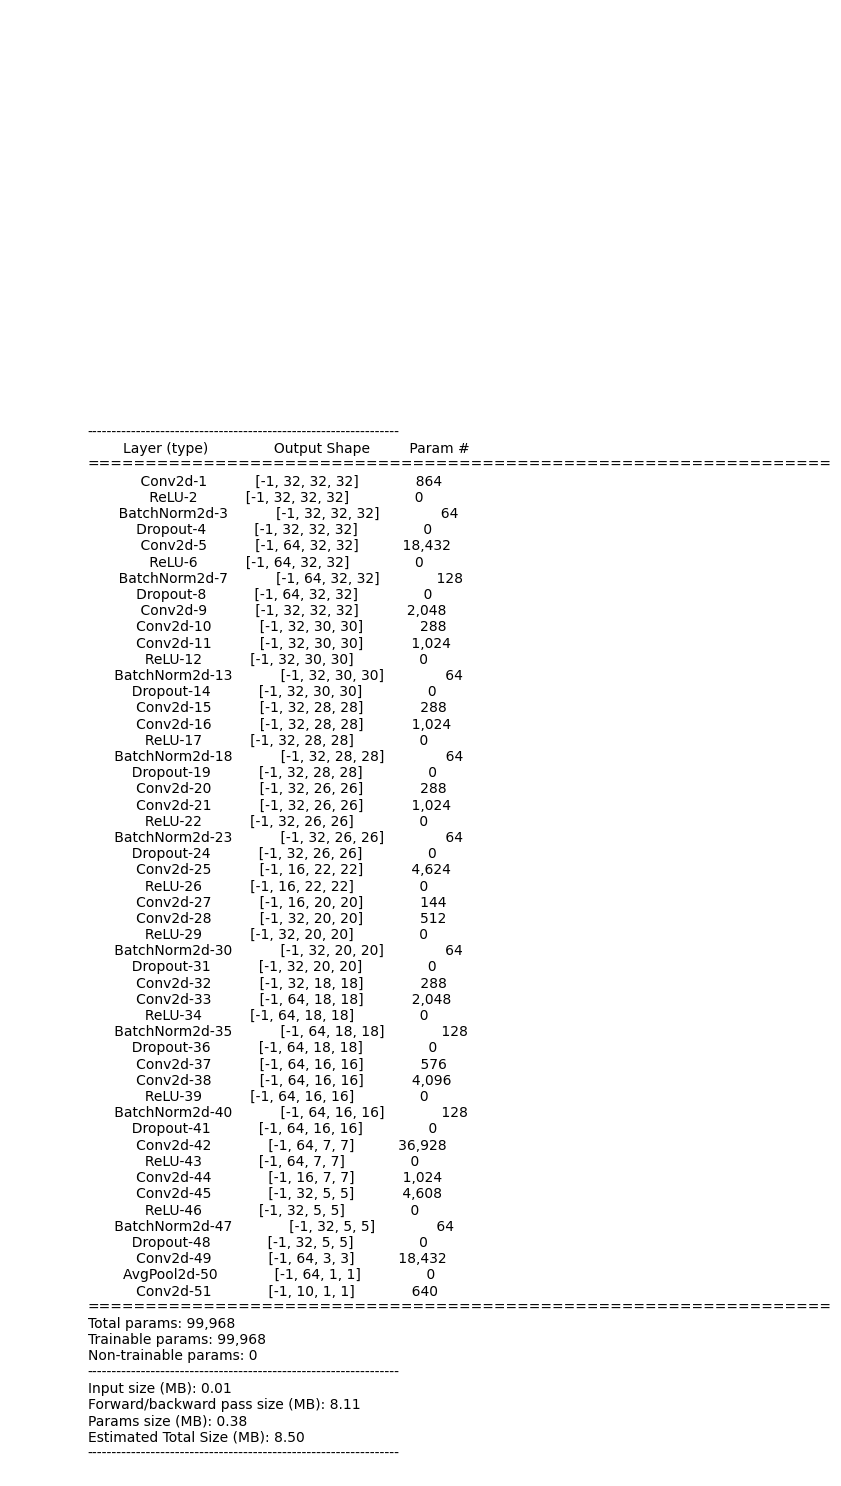

In [9]:
import sys
import matplotlib.pyplot as plt

# Save torchsummary output as PNG
summary_file = "summary.txt"
with open(summary_file, "w") as file:
    sys.stdout = file  # Redirect standard output to file
    summary(model, input_size=(3, 32, 32))
    sys.stdout = sys.__stdout__  # Reset standard output

# Convert summary.txt to PNG
with open(summary_file, "r") as file:
    text = file.read()

fig, ax = plt.subplots(figsize=(10, 6))
ax.text(0.1, 0.1, text, va="top", ha="left", wrap=True)
ax.axis("off")
plt.savefig("summary.png", bbox_inches="tight", dpi=300)